# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

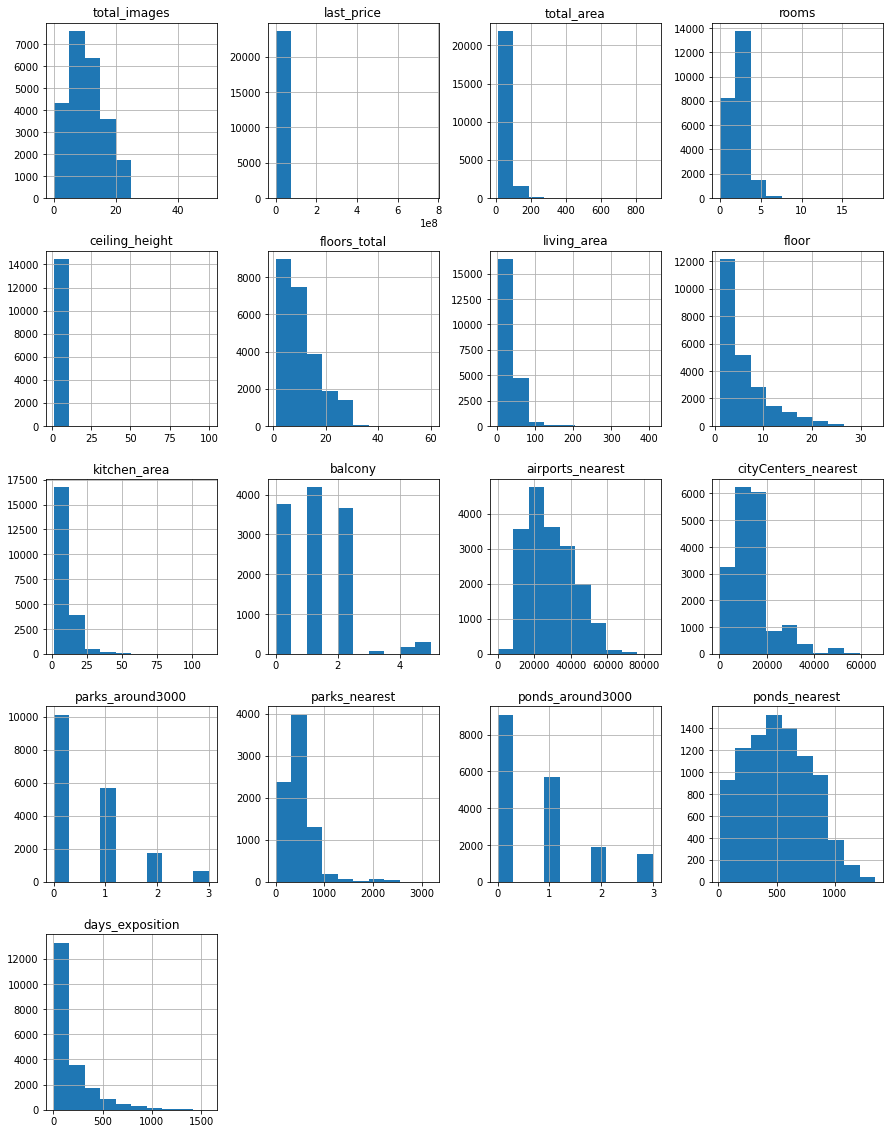

In [13]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-info">
подсчитваю количество пропусков по столбцам

в основных параметрах пропусков почти нет
    
скорее всего большое количество пропусков в остальных параметрах вызвано тем, что эти графы являются необязательными при заполнении 
</div>

In [15]:
data['balcony']=data['balcony'].fillna(0)
data['is_apartment']=data['is_apartment'].fillna(False)
data['floors_total']=data['floors_total'].fillna(100)
data['locality_name']=data['locality_name'].fillna('Не указан')
data['living_area']=data['living_area'].fillna(data['total_area']*(data['living_area'].mean()/data['total_area'].mean()))
data['kitchen_area']=data['living_area'].fillna(data['total_area']*(data['kitchen_area'].mean()/data['total_area'].mean()))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">
заполняю значения только там, где это нужно для дальнейшего анализа, что бы не создавать синтетические данные
    
<b>дозаполнил пропуски в kitchen area и living area </b>   
</div>

In [ ]:
data.info()
data['is_apartment']=data['is_apartment'].astype('bool')
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'])
data['balcony']=data['balcony'].astype('int32')
data['floors_total']=data['floors_total'].astype('int32')
data.info()

In [17]:
to_replace=['поселок ','городского ','типа ','деревня ','городской ','садоводческое некоммерческое товарищество','поселок при железнодорожной станции ','коттеджный поселок лесное']
data['locality_name']=data['locality_name'].str.lower()
data['locality_name']=data['locality_name'].str.replace('ё','е')
for i in to_replace:
    data['locality_name']=data['locality_name'].str.replace(i,'')

data['locality_name'].sort_values().unique()

array([' лесная поляна', 'агалатово', 'александровская', 'алексеевка',
       'аннино', 'аро', 'барышево', 'батово', 'бегуницы', 'белогорка',
       'белоостров', 'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'виллози',
       'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 

<div class="alert alert-block alert-info">
Убираю все слова кроме названий самих населенных пунктов, что бы избежать дублликатов 
</div>

In [18]:

data.loc[(data['ceiling_height']<100)&(data['ceiling_height']>=20),'ceiling_height']=data['ceiling_height']/10
data.loc[(data['ceiling_height']>10),'ceiling_height']=data['ceiling_height']/2
data.loc[(data['ceiling_height']>5)|(data['ceiling_height']<2),'ceiling_height']=np.nan
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['ceiling_height'].sort_values().unique()

array([2.        , 2.2       , 2.25      , 2.26      , 2.3       ,
       2.34      , 2.4       , 2.45      , 2.46      , 2.47      ,
       2.48      , 2.49      , 2.5       , 2.51      , 2.52      ,
       2.53      , 2.54      , 2.55      , 2.56      , 2.57      ,
       2.58      , 2.59      , 2.6       , 2.61      , 2.62      ,
       2.63      , 2.64      , 2.65      , 2.66      , 2.67      ,
       2.68      , 2.69      , 2.7       , 2.71      , 2.72      ,
       2.72526955, 2.73      , 2.74      , 2.75      , 2.76      ,
       2.77      , 2.78      , 2.79      , 2.8       , 2.81      ,
       2.82      , 2.83      , 2.84      , 2.85      , 2.86      ,
       2.87      , 2.88      , 2.89      , 2.9       , 2.91      ,
       2.92      , 2.93      , 2.94      , 2.95      , 2.96      ,
       2.97      , 2.98      , 2.99      , 3.        , 3.01      ,
       3.02      , 3.03      , 3.04      , 3.05      , 3.06      ,
       3.07      , 3.08      , 3.09      , 3.1       , 3.11   

<div class="alert alert-block alert-info">
сначала предполагаю, что значения 25м итп это 2.5м 
    
далее делю пополам высоты потолков характерные для двухэтажных квартир
    
остальные выделяющиеся значения заменяю на NaN, а далее на среднее зачение выстоы потолков
</div>

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Хорошее решение, также рекомендую заполнить пропуски в столбце ceiling_height медианой - она уже не будет подвержена выбросам

</div>




### Посчитайте и добавьте в таблицу новые столбцы

In [19]:
data['sqm_price']=data['last_price']/data['total_area']
data['day']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

def floor_type(row):
    if row['floor']==1:
        return('первый')
    elif row['floor']==row['floors_total']:
        return('последний')
    else:
        return('другой')
data['floor_type']=data.apply(floor_type,axis=1)

data['city_center_km']=round(data['cityCenters_nearest']/1000)
    
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day,month,year,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70000,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.72527,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.72527,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.72527,14,90.785766,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03000,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


<div class="alert alert-block alert-info">
добавляю новые столбцы согласно заданию
</div>

### Проведите исследовательский анализ данных

In [20]:
def delete_outliers(df):
    for col in df[list_to_outlers]:
              
        q = df[col].quantile([0.25, 0.75])
        top_border = q[0.75] + 1.5 * (q[0.75] - q[0.25])
        bot_border = q[0.25] - 1.5 * (q[0.75] - q[0.25])
      
        out_top_border_count = df[col][df[col] > top_border].count()
        out_bot_border_count = df[col][df[col] < bot_border].count()
        out_top_border_percent = out_top_border_count / df[col].count()
        out_bot_border_percent = out_bot_border_count / df[col].count()
        
        if out_top_border_percent + out_bot_border_percent < 0.1:
            df = df[(df[col] <= top_border) & (df[col] >= bot_border) | (df[col].isna())]       
        
        print('Доля выбросов в выборке:',col, f'{(out_top_border_percent + out_bot_border_percent):.2%}',
              f'(выбросов: {(out_top_border_count + out_bot_border_count)})')
    return df
list_to_outlers=['last_price','total_area','rooms','ceiling_height','living_area','kitchen_area','floors_total']
data2=delete_outliers(data)


Доля выбросов в выборке: last_price 8.58% (выбросов: 2034)
Доля выбросов в выборке: total_area 2.07% (выбросов: 449)
Доля выбросов в выборке: rooms 0.00% (выбросов: 0)
Доля выбросов в выборке: ceiling_height 7.76% (выбросов: 1647)
Доля выбросов в выборке: living_area 0.23% (выбросов: 45)
Доля выбросов в выборке: kitchen_area 0.00% (выбросов: 0)
Доля выбросов в выборке: floors_total 0.51% (выбросов: 99)


<div class="alert alert-block alert-info">
в данной функции вычисляю количество выбросов в ключевых параметрах
    
принимаю решение удалить все выбросы не смотря на то, что в некоторых местах они достигают 8% данных, т.к параметр цены является ключевым и может сильно исказить все последующие шаги анализа с ним связанные
    
на мой взгляд оставшихся 20тыс. строк вполне достаточно 
</div>

<div class="alert alert-block alert-info">
изначально я и хотел оставить как можно больше данных, но эти выбросы по ценам на квартиры в СПб которые в несколько десятков раз превышают все средние параметры, если их не убрать то данные например по маленькому поселку в Лен.обл получатся абослютно другие и менее правдоподобные 

я просто считаю что рынок квартир в цетре спб и рынок квартир в лен.обл. это 2 абослютно разных рынка у которых из общих основных параметров ценообразования только площадь,тогда как в питере квартира может стоить гораздо дороже соседней, просто имея пару окон на набережную или достопримечательность в отличие от квартиры в том же доме но окнами во двор.
    
и если в рамках данной работы надо рассматривать Спб и лен.обл вместе, тогда приходиться пожертвовать большой часть данных, но попытаться привести все к единым правилам ценообразования
</div>

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19425 non-null  int64         
 1   last_price            19425 non-null  float64       
 2   total_area            19425 non-null  float64       
 3   first_day_exposition  19425 non-null  datetime64[ns]
 4   rooms                 19425 non-null  int64         
 5   ceiling_height        19425 non-null  float64       
 6   floors_total          19425 non-null  int32         
 7   living_area           19425 non-null  float64       
 8   floor                 19425 non-null  int64         
 9   is_apartment          19425 non-null  bool          
 10  studio                19425 non-null  bool          
 11  open_plan             19425 non-null  bool          
 12  kitchen_area          19425 non-null  float64       
 13  balcony         

count    19425.000000
mean        50.839516
std         16.120158
min         12.000000
25%         38.000000
50%         47.000000
75%         61.000000
max        100.600000
Name: total_area, dtype: float64

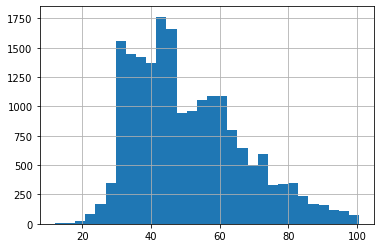

In [22]:
data2['total_area'].hist(bins=30)
data2['total_area'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 
</div>

count    19425.000000
mean        28.936585
std         11.373038
min          2.000000
25%         18.000000
50%         28.200000
75%         37.000000
max         65.400000
Name: living_area, dtype: float64

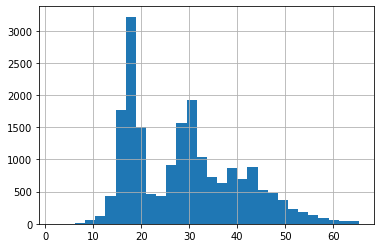

In [23]:
data2['living_area'].hist(bins=30)
data2['living_area'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

присутствуют пики отображающие типовые значения, вызваны однотипной застройкой
</div>

count    19425.000000
mean        28.936585
std         11.373038
min          2.000000
25%         18.000000
50%         28.200000
75%         37.000000
max         65.400000
Name: kitchen_area, dtype: float64

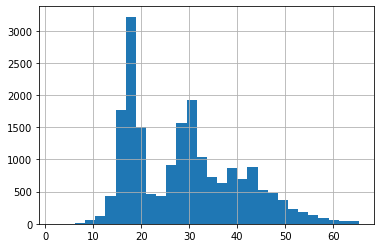

In [24]:
data2['kitchen_area'].hist(bins=30)
data2['kitchen_area'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 
</div>

count    1.942500e+04
mean     4.577345e+06
std      2.019624e+06
min      4.300000e+05
25%      3.230000e+06
50%      4.243000e+06
75%      5.600000e+06
max      1.190000e+07
Name: last_price, dtype: float64

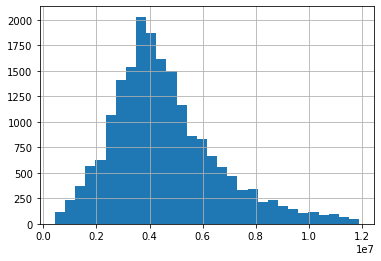

In [25]:
data2['last_price'].hist(bins=30)
data2['last_price'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

цена распределена нормально, без пика у 0 и хвостом в право показывающим наличие дорогих квартир в регионе
</div>

count    19425.000000
mean         1.857658
std          0.856023
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: rooms, dtype: float64

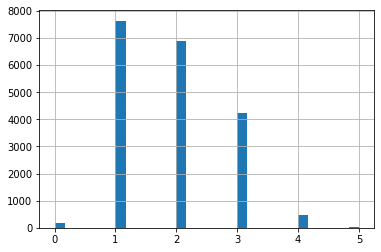

In [26]:
data2['rooms'].hist(bins=30)
data2['rooms'].describe()

<div class="alert alert-block alert-info">
все значения соответвуют реальным 
    
одна и двух комнатные картиры ожидаемо самые популярные
</div>

count    19425.000000
mean         2.661791
std          0.099035
min          2.450000
25%          2.560000
50%          2.725270
75%          2.725270
max          2.910000
Name: ceiling_height, dtype: float64

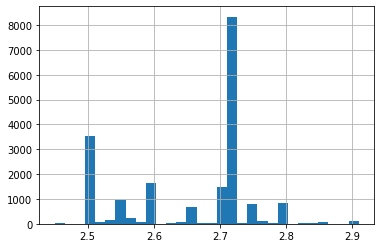

In [27]:
data2['ceiling_height'].hist(bins=30)
data2['ceiling_height'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

присутствуют пики отображающие типовые значения, вызваны однотипной застройкой
</div>

count    19425.000000
mean         6.060129
std          4.965717
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

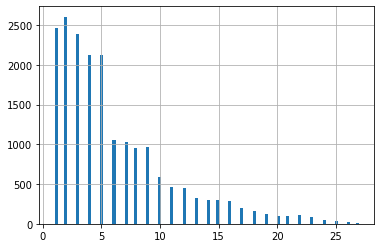

In [28]:
data2['floor'].hist(bins=100)
data2['floor'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

этажи с первого по пятый самые популярные в виду большого количества пятиэтажной застройки в спб лен.обл
</div>

count      19425
unique         3
top       другой
freq       14395
Name: floor_type, dtype: object

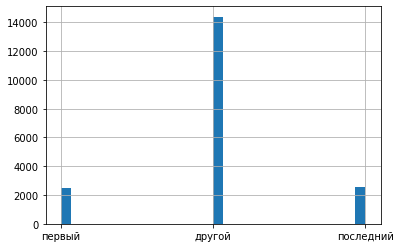

In [29]:
data2['floor_type'].hist(bins=30)
data2['floor_type'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 
</div>

count    19425.000000
mean        11.125560
std          6.602516
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

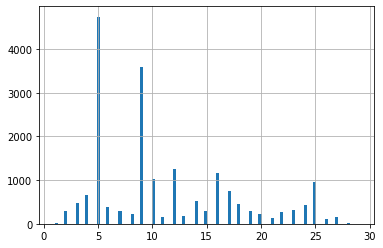

In [30]:
data2['floors_total'].hist(bins=100)
data2['floors_total'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

5-ти и 9-ти этажные дома как было сказанно ранее, являются большой частью засройки спб и лен.обл
</div>

count    14202.000000
mean     15611.915998
std       8250.635457
min        399.000000
25%      11360.000000
50%      14042.000000
75%      16890.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

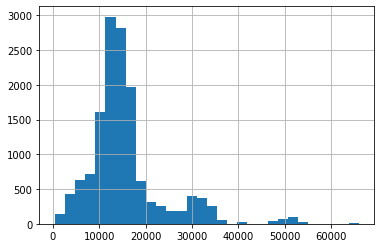

In [31]:
data2['cityCenters_nearest'].hist(bins=30)
data2['cityCenters_nearest'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

в среденем КАД находится в 20-25км от центра Спб, это значит большое число квартир как раз и находится в спальных районах на удалении 10-20км 
</div>

count    14191.000000
mean     29244.538651
std      13269.790447
min          0.000000
25%      17698.500000
50%      27933.000000
75%      38999.000000
max      84869.000000
Name: airports_nearest, dtype: float64

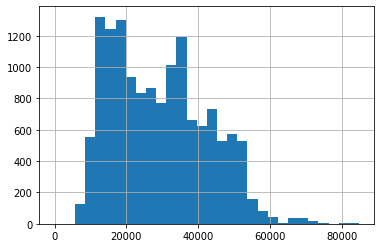

In [32]:
data2['airports_nearest'].hist(bins=30)
data2['airports_nearest'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

</div>

count    5515.000000
mean      501.855485
std       336.026866
min         1.000000
25%       303.000000
50%       467.000000
75%       624.500000
max      3190.000000
Name: parks_nearest, dtype: float64

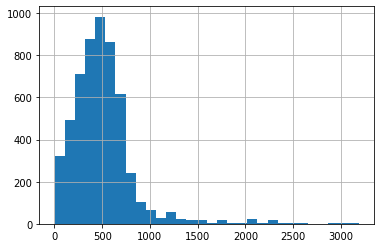

In [33]:
data2['parks_nearest'].hist(bins=30)
data2['parks_nearest'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

в СПб много парков так что большое число малых значений не кажется странным
</div>

count    19425.000000
mean         2.583115
std          1.796655
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

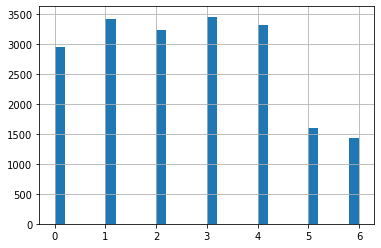

In [34]:
data2['day'].hist(bins=30)
data2['day'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

в выходные люди меньше занимаются продажей квартиры, скорее всего из за отдыха, поездок на дачу итп
</div>

count    19425.000000
mean         6.400875
std          3.489477
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

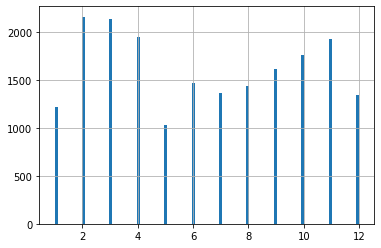

In [35]:
data2['month'].hist(bins=100)
data2['month'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

в зимние и летние месяцы люди менее активно занимаются продажами квартир, предоположу, что это связанно с отпусками и поездками
</div>

count    17182.000000
mean       167.493016
std        205.765138
min          1.000000
25%         43.000000
50%         89.000000
75%        211.000000
max       1580.000000
Name: days_exposition, dtype: float64

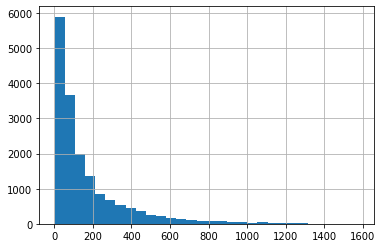

In [36]:
data2['days_exposition'].hist(bins=30)
data2['days_exposition'].describe()

<div class="alert alert-block alert-info">
график похож на отображение реальной ситуации, аномалий или выбросов не вижу 

далее хочу проверить начальную область графика подробнее, что бы быть уверенным в точности вычисления "быстрой/долгой" продажи
</div>

<AxesSubplot:>

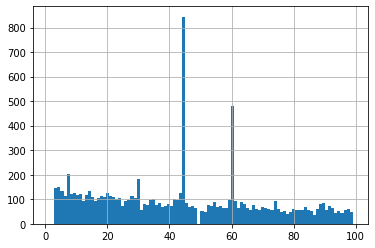

In [37]:
data2.loc[data2['days_exposition']<100]['days_exposition'].hist(bins=100)

In [38]:
days_list=[7,30,45,60]
for i in days_list:
    data2['days_exposition']=data2.loc[(data2['days_exposition']!=i)]['days_exposition']
data2['days_exposition']=data2.loc[(data2['days_exposition']>45.01)|(data2['days_exposition']<44.99)]['days_exposition']

<div class="alert alert-block alert-info">
пики на числах [7,30,45,60] скорее всего вызваны тем, что платформа для размещения объявлений имеет функционал подписки на показ объявления определенное количество дней, либо удаляет по прошедствии определенного количества дней в виду неактивности владельца объявления
    
считаю нужным удалить эти данные т.к. они могу являтся просто автоматически снятым объявлением, а не завершенной сделкой по покупке
</div>

count    15472.000000
mean       181.241404
std        212.347335
min          1.000000
25%         42.000000
50%        104.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

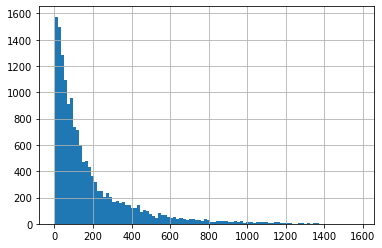

In [39]:
data2['days_exposition'].hist(bins=100)
data2['days_exposition'].describe()

<div class="alert alert-block alert-info">
по результатам вычислений можно сказать что:
    
менее 42 является быстрой продажей
    
более 236 является долгой продажей
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, данные о быстрых и долгих продажах вполне корректны. Пики действительно указывают на снятие объявления агрегатором: https://yandex.ru/support/realty/owner/home/add-ads-housing.html

</div>


0.6656872947088939

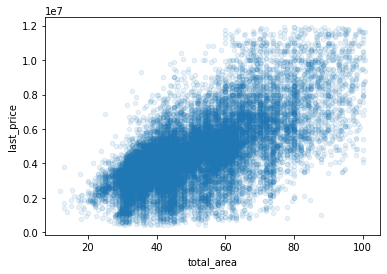

In [40]:
data2.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
data2['total_area'].corr(data2['last_price'])

<div class="alert alert-block alert-info">
между общей площадью и ценой ожидаемо есть сильная прямая связь
</div>

0.5221262477521744

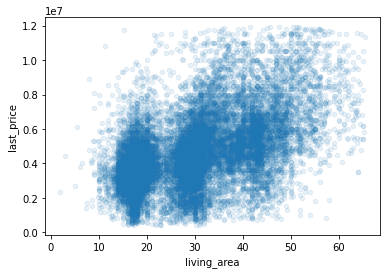

In [41]:
data2.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)
data2['living_area'].corr(data2['last_price'])

<div class="alert alert-block alert-info">
наличие свзяи показано, но это скорее всего не прямая связь

жилая площадь как и площадь кухни непосредственно связана с общей площадью, а та уже в свою очередь с ценой    
</div>

0.5221262477521744

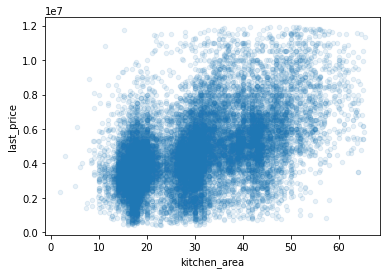

In [42]:
data2.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1)
data2['kitchen_area'].corr(data2['last_price'])

0.902755945912514

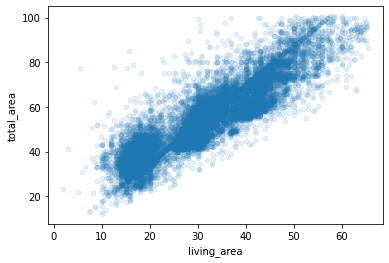

In [43]:
data2.plot(x='living_area', y='total_area', kind='scatter', alpha=0.1)
data2['living_area'].corr(data2['total_area'])

<div class="alert alert-block alert-info">
показываю свзязь жилой и общей площади в подтверждение написаного выше
</div>

0.3930464600454481

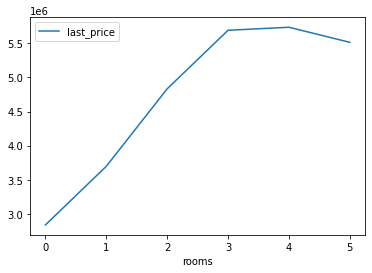

In [44]:
data_rooms=pd.pivot_table(data2,index='rooms', values='last_price', aggfunc='mean')
data_rooms.plot()
data2['rooms'].corr(data2['last_price'])

<div class="alert alert-block alert-info">
количество комнат имеет сильную связь с ценой квартиры (предполагаю, что коэффицент 0.4 достаточный что бы сказать что он имеет свзять,так как есть много параметров и они влияют все в совокупности, а не один 
</div>

<AxesSubplot:xlabel='floor_type'>

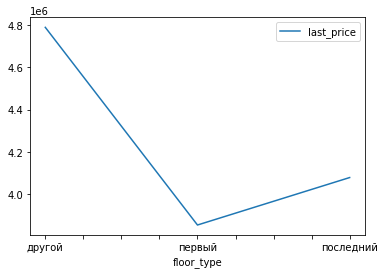

In [45]:
data_floor_type=pd.pivot_table(data2,index='floor_type', values='last_price', aggfunc='mean')
data_floor_type.plot()

<div class="alert alert-block alert-info">
первый и последний этаж ожидаемо дешевле аналогичного другого
</div>

<AxesSubplot:xlabel='day'>

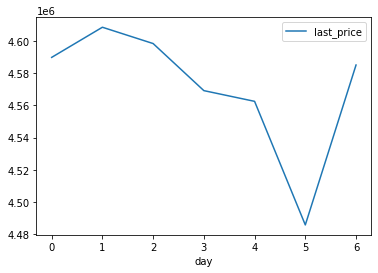

In [46]:
data_day=pd.pivot_table(data2, index='day',values='last_price', aggfunc='mean')
data_day.plot()

<div class="alert alert-block alert-info">
учитывая шаг графика по оси Y разброс почти отсутствует
</div>

<AxesSubplot:xlabel='month'>

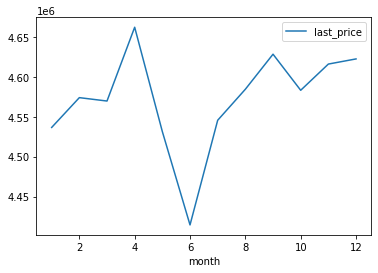

In [47]:
data_month=pd.pivot_table(data2, index='month',values='last_price', aggfunc='mean')
data_month.plot()

<div class="alert alert-block alert-info">
предположу что летом люди более благосклонны к снижению цены на квартиру
</div>

<AxesSubplot:xlabel='year'>

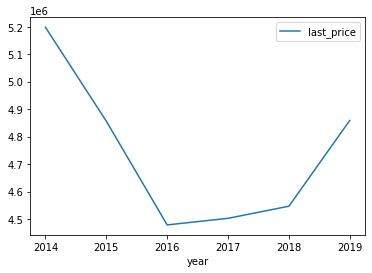

In [48]:
data_year=pd.pivot_table(data2, index='year',values='last_price', aggfunc='mean')
data_year.plot()

<div class="alert alert-block alert-info">
падение графика цены соответвует общему экономическому положению в стране в свзяи с кризисом
</div>

In [49]:
data_locality_name=pd.pivot_table(data2,index='locality_name', values=['floor','last_price','total_area'],
                                  aggfunc={'floor':'count','last_price':'mean','total_area':'mean'}
                                 ).sort_values(by='floor',ascending=False)
data_locality_name=data_locality_name[data_locality_name['floor']>200]
data_locality_name.columns=['Количество объявлений','Ср. цена', 'Ср. площадь']

In [50]:
data_locality_name['Ср.цена/кв.м']=data_locality_name['Ср. цена']/data_locality_name['Ср. площадь']
data_locality_name.sort_values(by='Ср.цена/кв.м',ascending=False)

,Количество объявлений,Ср. цена,Ср. площадь,Ср.цена/кв.м
locality_name,,,,
санкт-петербург,11963,5.364437e+06,51.765093,103630.389756
пушкин,300,5.135557e+06,51.682100,99368.186406
кудрово,464,4.308346e+06,46.062091,93533.449509
парголово,324,4.463582e+06,50.725309,87995.160268
мурино,579,3.670799e+06,43.993938,83438.749019
шушары,428,4.020465e+06,52.664626,76340.899831
колпино,315,3.753058e+06,50.761714,73934.814390
гатчина,283,3.332369e+06,48.962827,68059.157881
всеволожск,378,3.633432e+06,54.913968,66165.906025


<div class="alert alert-block alert-info">
вычислаю наибольшую среднюю цену кв.м. в 10 пунктах с наибольшим числом обЪявлений
</div>

-0.3189458565121021

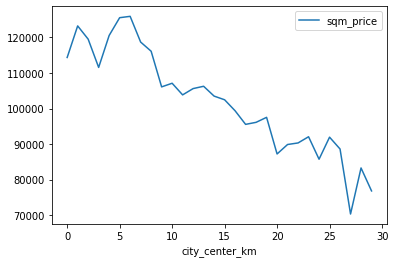

In [51]:
data_spb=data2[data2['locality_name']=='санкт-петербург']
data_spb=data_spb[data_spb['city_center_km']<=30]
data_spb_mean=pd.pivot_table(data_spb, index='city_center_km',values='sqm_price', aggfunc='mean')
data_spb_mean.plot()
data_spb['sqm_price'].corr(data_spb['city_center_km'])

<div class="alert alert-block alert-info">
свзять между удаленностью от центра Спб и ценой опреденно имеется (и очень сильная), но коэфицент это плохо отображает так как из за того, что в базе слишком мало дорогих объявлений из цетральной части Спб, их пришлось откинуть как "выбросы" иначе они очень сильно исказят информацию для анализа по остальным объявлениям из Лен. обл. 
</div>

### Общий вывод

<b>Параметры сильно влияющие на стоимость квартиры:</b>
* Общая площадь (цена растет с увеличением)
* Этаж (первый и последний дешевле)
* Месяц размещения (летом средняя цена заметно падает)
* Близость к центру (только в случает с Санкт-Петербургом)

Сейчас рынок квартир идет вверх после сильного падения 2014-2015 годов

Наибольшее число объявлений находиться в самом Спб и населенных пунктах в непосредственной близости к нему

Так же считаю не совсем корректным проводить анализ по Спб и Ленинградской области вместе т.к. это слишком крупный город и его данные не дают объективно оценить ситацию в малых населенных пунктах, где формирование цен может происходить по другим, отличным от СПб величинам (например: близость основным магистралям, близость к другим городам, инфраструктура конкретного населенного пункта)